In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [9]:
#Define the path to the excel file
file_path = r"C:\Users\barve\Desktop\Jeel\Customer Churn\Prediction_Data.xlsx"

#Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

#Read the data from the specified sheet into a pandas dataframe
data = pd.read_excel(file_path, sheet_name = sheet_name)

#Display the first few rows of the fetched data
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [11]:
#Data Processing
#Drop Columns from the data that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'],axis = 1)

#List of Column to be lable encoded
columns_to_encode = [
    'Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type','Online_Security','Online_Backup',
    'Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract','Paperless_Billing',
    'Payment_Method'
]

#Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

#Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0, 'Churned':1})

#Split data into features and target
X = data.drop('Customer_Status', axis = 1)
y = data['Customer_Status']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
#Train Random Forest Model
#Initialize the random forest classifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[801  52]
 [122 227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       853
           1       0.81      0.65      0.72       349

    accuracy                           0.86      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.86      0.85      1202



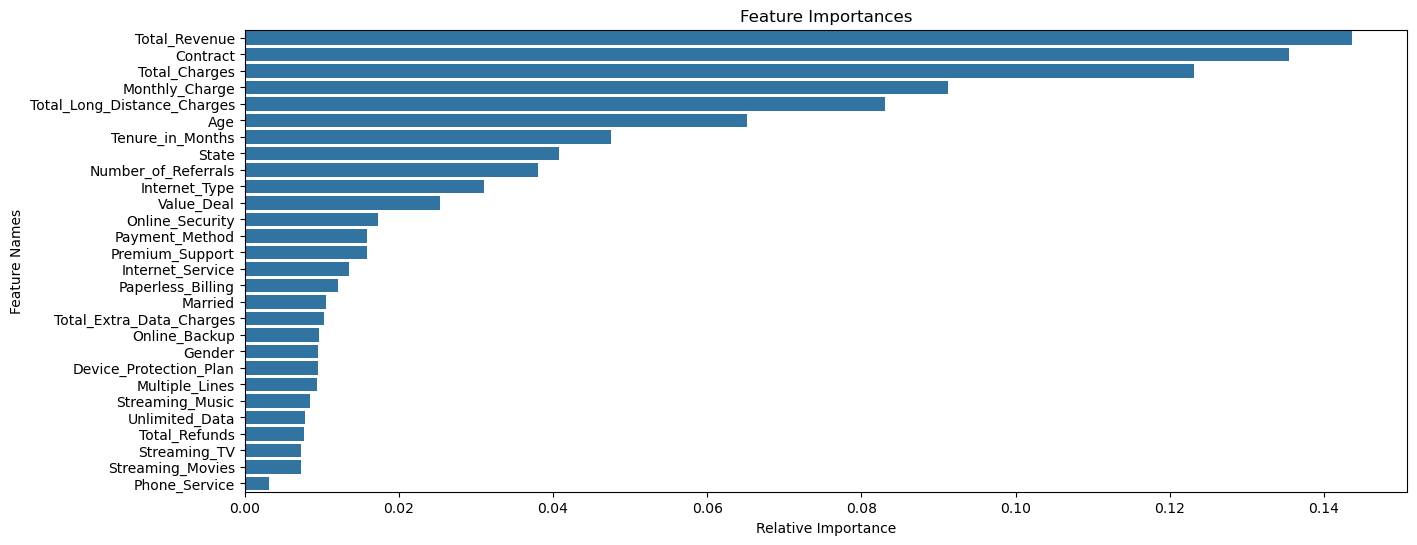

In [17]:
#Evaluate Model
#Make Predictions
y_pred = rf_model.predict(X_test)

#Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Feature Selection using feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

#Plot the feature importances
plt.figure(figsize = (15,6))
sns.barplot(x= importances[indices], y= X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [19]:
#Predict the New Data
#Define the path to the joiner data in Excel File
file_path = r"C:\Users\barve\Desktop\Jeel\Customer Churn\Prediction_Data.xlsx"

#Define the sheet name to read data from
sheet_name = 'vw_JoinData'

#Read the data from the specified sheet into a pandas dataframe
new_data = pd.read_excel(file_path, sheet_name = sheet_name)

#Display the first few rows of the fetched data
print(new_data.head())

#Retain the original Dataframe to preserve unencoded columns
original_data = new_data.copy()

#Reatin the customer_ID column
customer_ids = new_data['Customer_ID']

#Drop columns that wont be used for prediction in the encoded Dataframe
new_data = new_data.drop(['Customer_ID','Customer_Status', 'Churn_Category', 'Churn_Reason'],axis = 1)

#Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

#Make Predictions
new_predictions = rf_model.predict(new_data)

#Add Predictions to the original Dataframe
original_data['Customer_Status_Predicted'] = new_predictions

#Filter the Dataframe to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

#Save the results
original_data.to_csv(r"C:\Users\barve\Desktop\Jeel\Customer Churn\Predictions.csv")


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   13058-MAD  Female   58      No  Madhya Pradesh                   13   
1   13123-BIH  Female   46      No           Bihar                   13   
2   15591-KAR  Female   26      No       Karnataka                    3   
3   17796-BIH  Female   65      No           Bihar                    5   
4   18015-ODI  Female   28     Yes          Odisha                   15   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                22        NaN           Yes             No  ...   
1                18     Deal 5           Yes             No  ...   
2                31        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                 9        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      46.099998    130.149994           0.0   
1  Bank Wi